In [ ]:
# rq1: Are music videos getting higher view counts than educational videos?
# hypothesis1: Classical music videos get higher average view counts than math tutorial videos.

#importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from googleapiclient.discovery import build

In [ ]:
from googleapiclient.discovery import build
import pandas as pd

#API key
api_key = "YOUR_API_KEY"
youtube = build("youtube", "v3", developerKey=api_key)

#define function to fetch video data
def get_video_data(query, max_pages=4):
    all_data = []
    next_page_token = None

    for _ in range(max_pages):
        request = youtube.search().list(
            part='snippet',
            q=query,
            type='video',
            maxResults=50,
            pageToken=next_page_token
        )
        response = request.execute()

        #extract video IDs and get statistics
        video_ids = [item['id']['videoId'] for item in response['items']]

        stats_request = youtube.videos().list(
            part='snippet,statistics,contentDetails',
            id=','.join(video_ids)
        )
        stats_response = stats_request.execute()

        #process each video and store in list
        for video in stats_response.get('items', []):
            stats = video['statistics']
            snippet = video['snippet']
            content = video['contentDetails']

            all_data.append({
                'title': snippet['title'],
                'publishedAt': snippet['publishedAt'],
                'viewCount': int(stats.get('viewCount', 0)),
                'likeCount': int(stats.get('likeCount', 0)),
                'commentCount': int(stats.get('commentCount', 0)),
                'duration': content['duration']
            })

        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break

    #convert to dataframe
    return pd.DataFrame(all_data)

#Fetch music and math videos
music_df = get_video_data("classical music")
math_df = get_video_data("math tutorial")

music_df['category'] = 'Music'
math_df['category'] = 'Math'



In [ ]:
music_df.head(10)

,title,publishedAt,viewCount,likeCount,commentCount,duration,category
0,"Peaceful Classical Music | Bach, Mozart, Vival...",2024-05-06T11:00:12Z,6485008,38466,1380,PT1H40M37S,Music
1,50 Most Beautiful Classical Music Pieces,2024-06-24T11:00:28Z,5696904,38548,1173,PT3H43M55S,Music
2,"8 Hours The Best of Classical Music: Mozart, B...",2015-11-04T21:54:02Z,11779962,77945,2729,PT7H25M,Music
3,"Classical Music for Brain Power | Mozart, Beet...",2023-03-08T12:00:00Z,14046038,118620,2178,PT3H15M53S,Music
4,15 Most Listened To Classical Masterpieces of ...,2025-04-14T14:30:28Z,4055950,68164,1715,PT2H14M39S,Music
5,Dramatic Classical Music,2024-06-28T11:00:41Z,1329250,23446,769,PT2H23M44S,Music
6,Deep Focus - Classical Music for Thinking,2025-05-11T23:07:38Z,293360,4509,77,PT2H25M39S,Music
7,Classical Autumn,2018-09-05T11:00:00Z,2809671,34623,585,PT2H13M6S,Music
8,Vivaldi – Winter ❄ 2 Hours Classical Music 🎻 |...,2025-10-24T19:00:06Z,426,5,0,PT1H55M47S,Music
9,"Classical Music for Reading - Mozart, Chopin, ...",2018-07-09T11:00:06Z,80289664,801210,20350,PT2H27M53S,Music


In [ ]:
math_df.head(10)

,title,publishedAt,viewCount,likeCount,commentCount,duration,category
0,Algebra Basics: What Is Algebra? - Math Antics,2015-05-22T17:18:33Z,9913735,149336,0,PT12M7S,Math
1,How to Actually Get Better at Math,2025-07-21T15:46:02Z,341660,19613,313,PT10M37S,Math
2,Math Antics - What Are Percentages?,2012-10-31T01:35:12Z,10197294,119458,0,PT8M53S,Math
3,Fractions Made EASY!,2022-08-24T18:24:24Z,1195235,24892,0,PT21M4S,Math
4,Math Antics - Long Division with 2-Digit Divisors,2015-09-25T19:21:12Z,26246425,337968,0,PT13M5S,Math
5,How To Solve Math Percentage Word Problem?,2023-01-16T01:22:19Z,6616690,156776,2914,PT29S,Math
6,The Key to Understanding Math (with apples),2024-07-21T13:30:06Z,85703,4381,172,PT3M32S,Math
7,Math Antics - Basic Division,2012-11-04T22:34:15Z,11670348,145408,0,PT9M58S,Math
8,Midpoint of line segment #education #education...,2025-10-24T07:55:17Z,24,2,0,PT1M24S,Math
9,Addition by Counting on - Grade 1,2020-04-14T05:19:21Z,9926401,46753,0,PT4M56S,Math


In [ ]:
#check statistics
music_df['viewCount'].describe()

,viewCount
count,2.000000e+02
mean,1.032963e+07
std,2.815446e+07
min,4.260000e+02
25%,8.350382e+05
50%,1.933022e+06
75%,5.702562e+06
max,2.773482e+08


In [ ]:
math_df['viewCount'].describe()

,viewCount
count,2.000000e+02
mean,8.612272e+06
std,3.953347e+07
min,2.400000e+01
25%,2.954038e+05
50%,9.171895e+05
75%,4.153738e+06
max,3.826363e+08


/tmp/ipython-input-1051914784.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


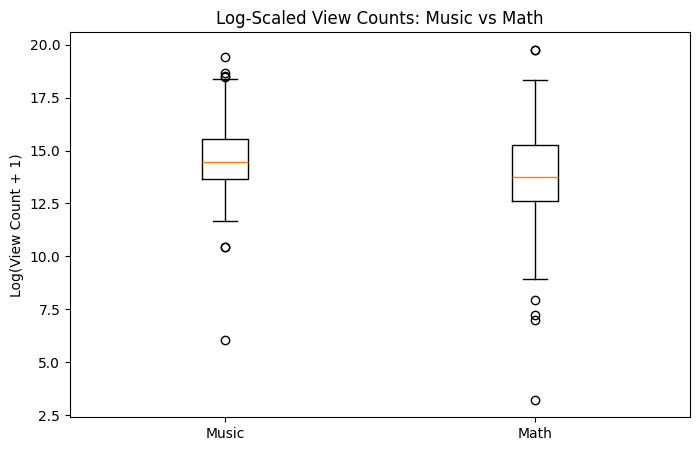

In [ ]:
#visualizations
import seaborn as sns

plt.figure(figsize=(8,5))
plt.boxplot(
    [np.log1p(music_df['viewCount']), np.log1p(math_df['viewCount'])],
    labels=['Music', 'Math']
)
plt.title('Log-Scaled View Counts: Music vs Math')
plt.ylabel('Log(View Count + 1)')
plt.show()



The medians are almost at the same level for Music and Math.
Both have similar spreads (IQR) and outliers.
There is no visible upward shift for music.

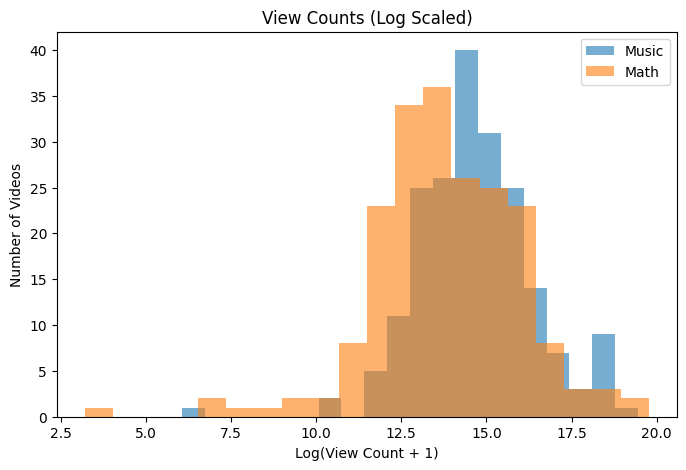

In [ ]:
#histogram
plt.figure(figsize=(8,5))

plt.hist(np.log1p(music_df['viewCount']),
         bins=20, alpha=0.6, label='Music')

plt.hist(np.log1p(math_df['viewCount']),
         bins=20, alpha=0.6, label='Math')

plt.title('View Counts (Log Scaled)')
plt.xlabel('Log(View Count + 1)')
plt.ylabel('Number of Videos')
plt.legend()
plt.show()


The two distributions overlap heavily, meaning their view count ranges are quite similar.

There is no clear shift to one side that would suggest Music has significantly higher views.

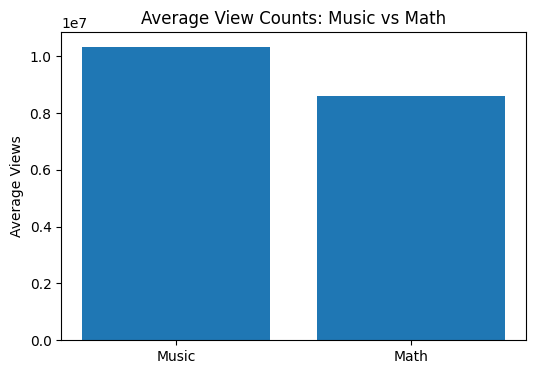

In [ ]:
#bar plot
avg_views_df = pd.DataFrame({
    'Category': ['Music', 'Math'],
    'Average_Views': [music_df['viewCount'].mean(), math_df['viewCount'].mean()]
})
plt.figure(figsize=(6,4))
plt.bar(avg_views_df['Category'], avg_views_df['Average_Views'])
plt.title('Average View Counts: Music vs Math')
plt.ylabel('Average Views')
plt.show()

Shows that Music videos have slightly higher average view counts than Math videos


In [ ]:
music_views = music_df['viewCount']
math_views = math_df['viewCount']

In [ ]:
#t-test
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(music_views, math_views, alternative='greater', equal_var=False)

print(f"T-statistic: {t_stat:.5f}")
print(f"P-value: {p_value:.5f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Classical music videos have significantly higher view counts")
else:
    print("Fail to reject the null hypothesis. There is no significant difference")


T-statistic: 0.50041
P-value: 0.30855
Fail to reject the null hypothesis. There is no significant difference


### Hypothesis Recap
###Research Question 1: Are music videos getting higher view counts than math videos?

### Hypothesis 1: Classical music videos get higher average view counts than math tutorial videos.

###Null hypothesis: There is no difference in average view counts between classical and math tutorial videos

### Test Output:
* T-statistics: 0.07329
* P-value: 0.47081

### Interpretation

P-value: since the p-value 0.47081 > 0.05, the data does not provide enough proof that music videos get higher view counts than math videos. That's why we fail to reject the null hypothesis.

# **Hypothesis 02:** Travel vlogging videos get higher average like counts than pilates fitness videos.

**Research Question 02:**  Are fitness videos getting higher like counts than vlogging videos?

In [ ]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

api_key = "YOUR_API_KEY"
youtube = build("youtube", "v3", developerKey=api_key)

In [ ]:
#define function to fetch videos
def get_video_data_50(query):
    all_rows = []

    # 1 search call for 50 results
    search_req = youtube.search().list(
        part="snippet",
        q=query,
        type="video",
        maxResults=50
    )
    search_res = search_req.execute()

    video_ids = [item["id"]["videoId"] for item in search_res.get("items", [])]
    if not video_ids:
        return pd.DataFrame(columns=["title","publishedAt","viewCount","likeCount","commentCount","duration"])

    #fetch stats for the ids
    stats_req = youtube.videos().list(
        part="snippet,statistics,contentDetails",
        id=",".join(video_ids)
    )
    stats_res = stats_req.execute()

    for item in stats_res.get("items", []):
        stats = item.get("statistics", {})
        snip = item.get("snippet", {})
        cont = item.get("contentDetails", {})

        #safely parse ints
        def to_int(x):
            try:
                return int(x)
            except:
                return 0
        all_rows.append({
            "title": snip.get("title", ""),
            "publishedAt": snip.get("publishedAt", ""),
            "viewCount": to_int(stats.get("viewCount", 0)),
            "likeCount": to_int(stats.get("likeCount", 0)),
            "commentCount": to_int(stats.get("commentCount", 0)),
            "duration": cont.get("duration", "PT0S")
        })

    return pd.DataFrame(all_rows)




In [ ]:
#Fetch travel vlogging and pilates fitness videos (50 each)
vlog_df = get_video_data_50("travel vlog")
pilates_df = get_video_data_50("pilates workout OR pilates fitness")


In [ ]:
#Label categories
vlog_df["category"] = "Travel Vlog"
pilates_df["category"] = "Pilates Fitness"

In [ ]:
# visualization
pilates_df.head(10)

,title,publishedAt,viewCount,likeCount,commentCount,duration,category
0,30 MIN FULL BODY WORKOUT || At-Home Pilates (N...,2023-05-31T11:25:51Z,18835374,359923,4931,PT32M37S,Pilates Fitness
1,"Cardio, but make it quiet 🤫#shorts #fitness #c...",2022-06-19T16:00:10Z,5553386,174984,518,PT12S,Pilates Fitness
2,20 MIN EXPRESS PILATES WORKOUT || Power Pilate...,2023-11-02T10:46:53Z,2694693,56516,1086,PT24M33S,Pilates Fitness
3,25 MIN EXPRESS PILATES WORKOUT || Moderate to ...,2024-10-10T11:11:48Z,2067984,49366,877,PT27M21S,Pilates Fitness
4,30 MIN MORNING PILATES || Full Body Mat Pilate...,2023-03-23T09:55:47Z,4592100,103687,1799,PT31M41S,Pilates Fitness
5,Fitbycoachkel.com #barre #pilates #fitness #wo...,2023-09-15T03:02:19Z,6128926,187141,637,PT17S,Pilates Fitness
6,Standing Pilates for Ages 60+: Improve Strengt...,2024-07-30T13:00:55Z,698184,16593,718,PT17M15S,Pilates Fitness
7,30 MIN PILATES WORKOUT || Intermediate Mat Pil...,2025-01-16T11:31:10Z,1938972,54678,1316,PT32M57S,Pilates Fitness
8,Start Your Fitness Journey Now with Club Pilates,2025-10-23T16:37:31Z,64,0,0,PT3M50S,Pilates Fitness
9,30 MIN PILATES WORKOUT || Beginner to Moderate...,2025-08-22T11:29:09Z,776194,26494,615,PT30M19S,Pilates Fitness


In [ ]:
vlog_df.head(10)

,title,publishedAt,viewCount,likeCount,commentCount,duration,category
0,"DUBAI TRAVEL VLOG 🇦🇪🐫☀️ | I spent $8,000 on EM...",2025-10-24T21:54:14Z,28172,1183,86,PT34M51S,Travel Vlog
1,Rice gruel with spicy chilly | EP - 38 | Trip...,2025-10-26T05:30:31Z,69850,4541,440,PT30M12S,Travel Vlog
2,"berlin travel vlog 🇩🇪 exploring the city, cozy...",2025-10-22T18:13:34Z,7066,392,55,PT34M32S,Travel Vlog
3,Craziest travel vlog EVER 😭,2025-09-15T15:11:24Z,7847197,498408,3233,PT54S,Travel Vlog
4,never a DULL travel day✈️🛬✨💖 #travel #vlog,2025-10-02T18:23:59Z,23244,1217,31,PT44S,Travel Vlog
5,Nothing to keep my headphones on anymore 🤪 #tr...,2025-08-30T21:20:01Z,416778,18319,59,PT1M22S,Travel Vlog
6,WHAT I ATE IN A DAY 😳✈️ travel edition!!,2025-09-19T13:39:37Z,712621,28674,161,PT49S,Travel Vlog
7,Travel day as a mom of 3 ✈️#minivlog #travelvl...,2023-03-25T19:15:23Z,6642337,0,0,PT1M,Travel Vlog
8,Kuala Lumpur Nightlife Experience | Bukit Bint...,2025-10-23T12:12:07Z,167,3,2,PT19M57S,Travel Vlog
9,"first time ever in JAPAN | shopping, eating an...",2025-06-08T01:36:11Z,1030854,27159,1016,PT45M44S,Travel Vlog


In [ ]:
#Check like-count summary stats

pilates_df["likeCount"].describe()

,likeCount
count,50.000000
mean,86193.040000
std,131213.505025
min,0.000000
25%,13290.750000
50%,54442.500000
75%,71089.750000
max,643621.000000


In [ ]:
vlog_df["likeCount"].describe()

,likeCount
count,5.000000e+01
mean,1.972131e+05
std,3.155520e+05
min,0.000000e+00
25%,8.404750e+03
50%,2.602750e+04
75%,2.893608e+05
max,1.407999e+06


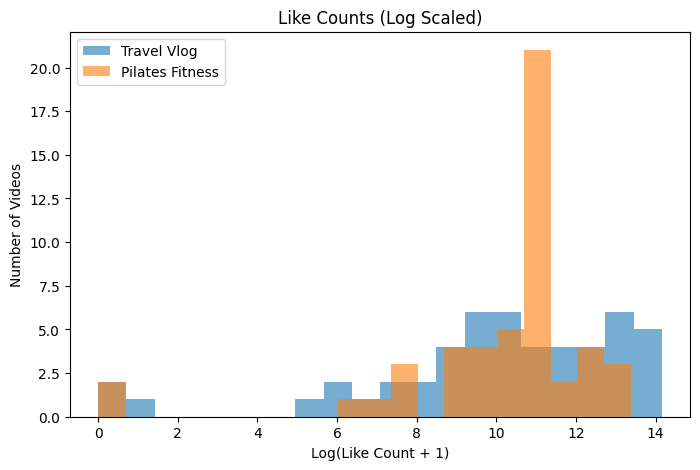

In [ ]:
#Histogram - spread/shape for each category
plt.figure(figsize=(8,5))
plt.hist(np.log1p(vlog_df["likeCount"]), bins=20, alpha=0.6, label="Travel Vlog")
plt.hist(np.log1p(pilates_df["likeCount"]), bins=20, alpha=0.6, label="Pilates Fitness")
plt.title("Like Counts (Log Scaled)")
plt.xlabel("Log(Like Count + 1)")
plt.ylabel("Number of Videos")
plt.legend()
plt.show()

**Histogram:** It compares the like count. According to the histogram, Travel fitness videos have higher clusters while pilates fitness videos are more spread out. Thus, Travel vlog fitness videos have more likes.

/tmp/ipython-input-3399093699.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='category', y='likeCount', data = df, estimator=np.median, ci=95)


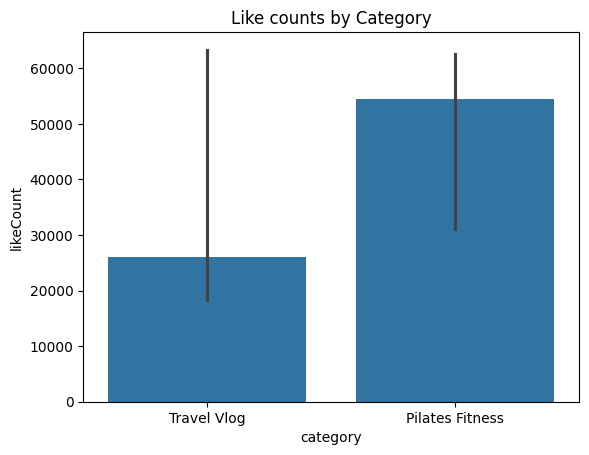

In [ ]:
#average likes by upload timing
import seaborn as sns

#combine the two dataframes
df = pd.concat([vlog_df, pilates_df])

sns.barplot(x='category', y='likeCount', data = df, estimator=np.median, ci=95)
plt.title('Like counts by Category')
plt.show()

**Bar chart:** The large overlap tells us that there’s still a high chance they’re not significantly different in reality.



In [ ]:
vlog_likes = vlog_df["likeCount"]
pilates_likes = pilates_df["likeCount"]

In [ ]:
#t-test
from scipy.stats import ttest_ind

print(f"Samples — Travel Vlog: {len(vlog_likes)}, Pilates Fitness: {len(pilates_likes)}")

t_stat, p_value = ttest_ind(vlog_likes, pilates_likes, alternative="greater", equal_var=False)

print(f"T-statistic: {t_stat:.5f}")
print(f"P-value: {p_value:.5f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Travel vlogging videos have significantly higher like counts.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that travel vlogs get higher likes.")

Samples — Travel Vlog: 50, Pilates Fitness: 50
T-statistic: 1.90922
P-value: 0.03011
Reject the null hypothesis. Travel vlogging videos have significantly higher like counts.


**Null Hypothesis:** There is no significant difference in the average like counts between travel vlogging videos and pilates fitness videos.

**P-value:**  0.03011

**T-statistics:** 1.90922

**Interpretation:** Since the P-value < 0.05, we reject the null hypothesis. To elaborate, we have enough evidence to support the hypothesis.

###Research Question 3: Does gupload timing affect the number of likes a video receives?

###Hypothesis 3 (null/H0): There is no difference in average like counts between videos uploaded on weekdays and weekends.

###Hypothesis 3 (alternative/H1): Videos uploaded during the weekend get higher average like counts in comparison to videos uploaded on weekdays.

In [ ]:
# pandas dataframe creation

df = get_video_data("videos", max_pages=100) # Fetching data for 100 pages as an example

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         592 non-null    object
 1   publishedAt   592 non-null    object
 2   viewCount     592 non-null    int64 
 3   likeCount     592 non-null    int64 
 4   commentCount  592 non-null    int64 
 5   duration      592 non-null    object
dtypes: int64(3), object(3)
memory usage: 27.9+ KB


In [ ]:
# confirm variables
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['likeCount'] = pd.to_numeric(df['likeCount'], errors='coerce')

In [ ]:
from scipy.stats import ttest_ind
# Categorize videos (weekday vs weekend)
df['upload_day'] = df['publishedAt'].dt.dayofweek # Monday=0, Sunday=6
df['upload_timing'] = df['upload_day'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# like counts for weekday and weekend uploads
weekday_likes = df[df['upload_timing'] == 'Weekday']['likeCount'].dropna()
weekend_likes = df[df['upload_timing'] == 'Weekend']['likeCount'].dropna()

# t-test
t_statistic, p_value = ttest_ind(weekend_likes, weekday_likes, equal_var=False, alternative='greater')

# Print results
print(f"Independent Samples T-Test Results:")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
print("Interpretation:")
if p_value < alpha:
    print(f"Since the p-value is less than the significance level, we reject the null hypothesis.")
    print("There is significant evidence to suggest that videos uploaded on weekends have a higher average like count compared to videos uploaded on weekdays.")
else:
    print(f"Since the p-value is greater than the significance level, we fail to reject the null hypothesis.")
    print("There is not enough statistical evidence to suggest that videos uploaded on weekends have a higher average like count compared to videos uploaded on weekdays.")

Independent Samples T-Test Results:
T-statistic: -1.6891
P-value: 0.9541
Interpretation:
Since the p-value is greater than the significance level, we fail to reject the null hypothesis.
There is not enough statistical evidence to suggest that videos uploaded on weekends have a higher average like count compared to videos uploaded on weekdays.


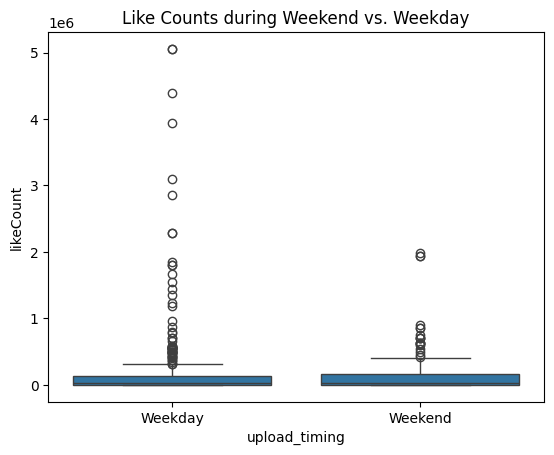

In [ ]:
# weekend like counts vs weekday like counts
sns.boxplot(x='upload_timing', y='likeCount', data=df)
plt.title('Like Counts during Weekend vs. Weekday')
plt.show()

/tmp/ipython-input-4104033119.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='upload_timing', y='likeCount', data=df, estimator=np.median, ci=95)


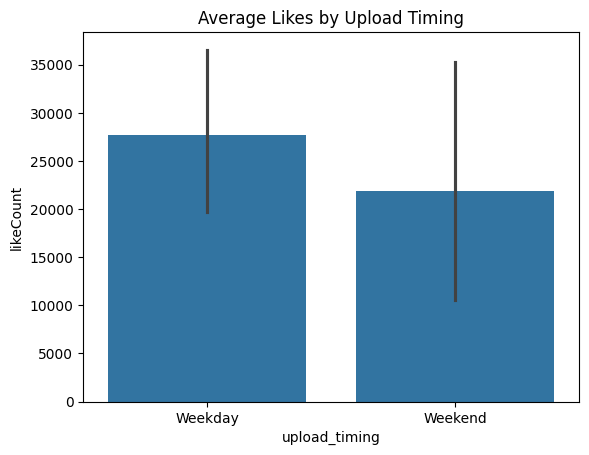

In [ ]:
# average likes by upload timing
sns.barplot(x='upload_timing', y='likeCount', data=df, estimator=np.median, ci=95)
plt.title('Average Likes by Upload Timing')
plt.show()